In [1]:
import numpy as np
import matplotlib as plt
import os 
import matplotlib.pyplot as plt
import pandas as pd


## IMPORT ACOUSTIC EMISSION EXCEL DATA 

In [2]:

# Move up two levels from the current directory to reach the project root directory
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Build the full path to the Excel file in the 'data' folder
excel_path = os.path.join(base_path, 'data', 'BP_V33_EA.xlsx')

# Read the Excel file
BP = pd.read_excel(excel_path)



In [3]:

# Make a ditectory with the time ranges 
times_load = {
    "LL1_RISE": [184, 228],
    "LL1_CONSTANT": [228, 304],
    "LL1_LOW": [304, 372],
    "LL1B_RISE": [415, 513],
    "LL1B_CONSTANT": [513, 596],
    "LL1B_LOW": [596, 670],
    "LL2A_RISE": [813, 888],
    "LL2A_CONSTANT": [888, 948],
    "LL2A_LOW": [948, 1090],
    "LL2B_RISE": [1140, 1246],
    "LL2B_CONSTANT": [1246, 1605],
    "LL2B_LOW": [1605, 1682],
    "LL3A_RISE": [1769, 1947],
    "LL3A_CONSTANT": [1947, 2007],
    "LL3A_LOW": [2007, 2146],
    "LL3B_RISE": [2178, 2329],
    "LL3B_CONSTANT": [2329, 2620],
    "LL3B_LOW": [2620, 2766],
    "LL4A_RISE": [2813, 2980],
    "LL4A_CONSTANT": [2980, 3043],
    "LL4A_LOW": [3043, 3218],
    "LL4B_RISE": [3260, 3476],
    "LL4B_CONSTANT": [3476, 3752],
    "LL4B_LOW": [3752, 3919],
    "LL5A_RISE": [3963, 4228],
    "LL5A_CONSTANT": [4228, 4290],
    "LL5A_LOW": [4290, 4525],
    "LL5B_RISE": [4560, 4790],
    "LL5B_CONTANT": [4790, 5037],
    "LL5B_LOW": [5037, 5261],
    "LL6A_RISE": [5361, 5682],
}

# Funtion to put load level in the dataframe
def put_load_level(time):
    for level, range in times_load.items():
        if range[0] <= time < range[1]:
            return level
    return "WITHOUT_CLASIFY"  # Para tiempos fuera de los rangos dados

# Put the column 'load level' in DataFrame
BP['load level'] = BP['TIME'].apply(put_load_level)

# Verify the results
print(BP.head())

# Export to Excel
#rut_excel = os.path.join(os.getcwd(), 'BP_con_load_level.xlsx')
#BP.to_excel(rut_excel, index=False)


         TIME  LOAD_PAC  CH  RISE  COUN  ENER  DURATION  AMP  A-FRQ     RMS  \
0   98.026905  -1.70900   4   122    68    17      1258   55     54  0.0006   
1  100.273716 -17.96075   4    12    21     4       511   47     41  0.0002   
2  115.418299 -19.53350   4     8    25     5       726   46     34  0.0000   
3  115.423255 -49.94000   4   113    26     5       724   45     36  0.0012   
4  115.426552 -17.96075   4   113    19     4       558   45     34  0.0012   

   ASL  PCNTS  THR  R-FRQ  I-FRQ  SIG STRNGTH  ABS-ENERGY       load level  
0   19      9   40     51     73       106759    1841.000  WITHOUT_CLASIFY  
1    9      2   40     38    166        27987     289.058  WITHOUT_CLASIFY  
2    7      2   40     32    250        35048     292.674  WITHOUT_CLASIFY  
3   24      9   40     27     79        32025     250.693  WITHOUT_CLASIFY  
4   24      8   40     24     70        25044     206.516  WITHOUT_CLASIFY  


In [5]:
# Filtrar por canales para BP
group_BP=BP.groupby(BP.CH)
BP_ch1=group_BP.get_group(1)
BP_ch2=group_BP.get_group(2)
BP_ch3=group_BP.get_group(3)
BP_ch4=group_BP.get_group(4)
len(BP_ch1)


14546

# Exportar dataframes por canal

In [5]:

# Obtener el directorio padre (subcarpeta) donde está alojado el archivo
directorio_subcarpeta = os.getcwd()

# Exportar el DataFrame a un archivo Excel en la subcarpeta
ruta_excel = os.path.join(directorio_subcarpeta, 'BP - V33_EA_ch3.xlsx')
BP_ch4.to_excel(ruta_excel, index=False)
print(f"Se ha exportado el DataFrame a {ruta_excel}")

Se ha exportado el DataFrame a /Users/alejandravesga2024/Library/CloudStorage/OneDrive-UTNFacultadRegionalDELTA/DOCTORADO_ALEJANDRA/ENSAYOS/Analisis_Parametros_EA_Phyton/EnsayoXargay_vigas/Project-MachineLearning_BeamsAE/notebooks/BP_Beam/BP - V33_EA_ch3.xlsx


### GRAFICAR AMPLITUD VS TIEMPO BP

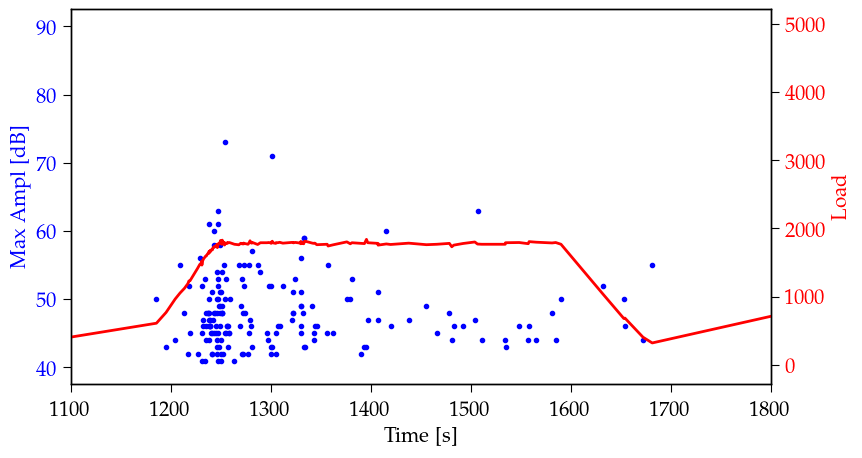

In [7]:
#BP canal 1

plt.figure(figsize=(10, 5))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Plot para el primer DataFrame
ax1 = plt.subplot(1, 1, 1)
color = 'blue'
ax1.set_xlabel('Time [s]', fontsize=15)
ax1.set_ylabel('Max Ampl [dB]', color=color, fontsize=15)
ax1.plot(BP_ch1['TIME'],BP_ch1['AMP'], 'o',markersize=3, color = color,label='Sensor1')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(1100,1800)

ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Load', color=color, fontsize=15)

ax2.plot(BP_ch1['TIME'],(BP_ch1['LOAD_PAC']),color=color)
ax2.tick_params(axis ='y', labelcolor = color)

plt.show()

In [ ]:
#BP canal 1

plt.figure(figsize=(10, 5))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Plot para el primer DataFrame
ax1 = plt.subplot(1, 1, 1)
color = 'blue'
ax1.set_xlabel('Time [s]', fontsize=15)
ax1.set_ylabel('Max Ampl [dB]', color=color, fontsize=15)
ax1.plot(BP_ch1['TIME'],BP_ch1['AMP'], 'o',markersize=3, color = color,label='Sensor1')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Load', color=color, fontsize=15)

ax2.plot(BP_ch1['TIME'],(BP_ch1['LOAD_PAC']),color=color)
ax2.tick_params(axis ='y', labelcolor = color)

plt.show()